# PS reconstruction, Gaussian beam

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from phase_space_reconstruction.virtual.beamlines import quadlet_tdc_bend
from phase_space_reconstruction.virtual.scans import run_awa_3d_scan, run_t_scan
from phase_space_reconstruction.diagnostics import ImageDiagnostic
from phase_space_reconstruction.train import train_3d_scan, train_3d_scan_parallel_gpus

from bmadx.distgen_utils import create_beam
from bmadx.plot import plot_projections
from bmadx.constants import PI

## Create synthetic ground truth beam

In [2]:
# create synthetic ground truth beam from base and transform yaml files
#yaml_dir = os.path.join('data', 'yaml_files')
save_dir = os.path.join('data', 'non_gaussian_beam', 'normal')
p0c = 43.36e6 # reference momentum in eV/c
gt_beam = torch.load("data/nonlinear_beam.pt")


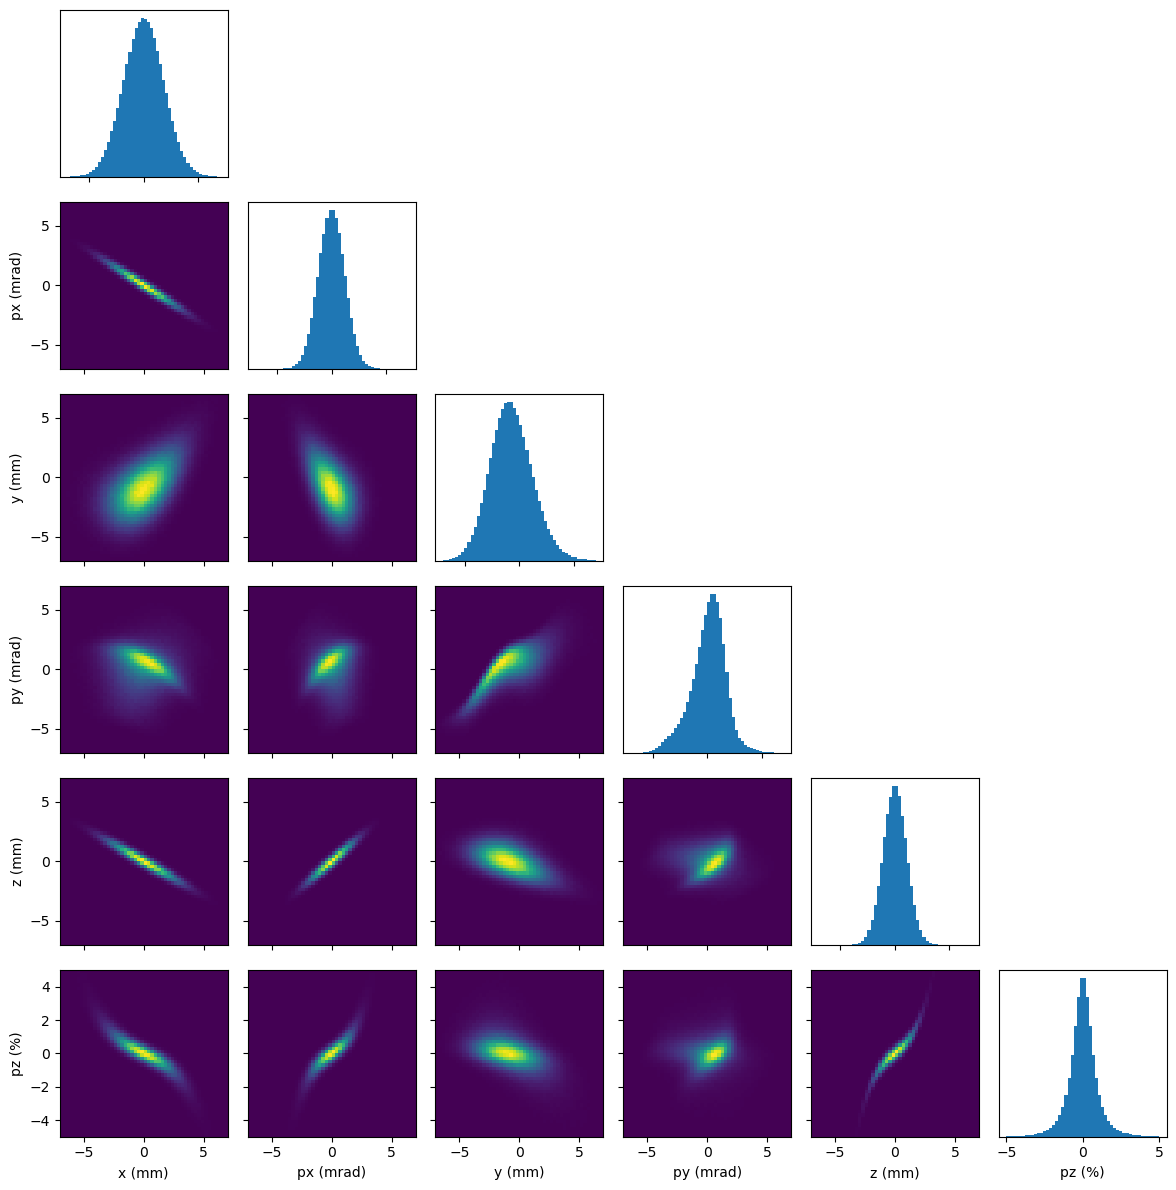

In [3]:
#plot gt beam
lims = np.array([[-7e-3, 7e-3],
                 [-7e-3, 7e-3],
                 [-7e-3, 7e-3],
                 [-7e-3, 7e-3],
                 [-7e-3, 7e-3],
                 [-5e-2, 5e-2]]) 
fig, ax = plot_projections(
    gt_beam.numpy_particles(),
    custom_lims = lims,
    background = 0
)
plt.show()

## Define diagnostics lattice parameters

In [4]:
# triplet params obtained from triplet-opt.ipynb

bins = torch.linspace(-25, 25, 200) * 1e-3
bandwidth = (bins[1]-bins[0]) / 2
train_dset_3d_scan = torch.load(os.path.join(save_dir, '3d_scan_train.dset'))

## Complete 3D scan training data

/global/homes/r/rroussel/.conda/envs/ps-reconstruction/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1694463969407/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([200, 200])


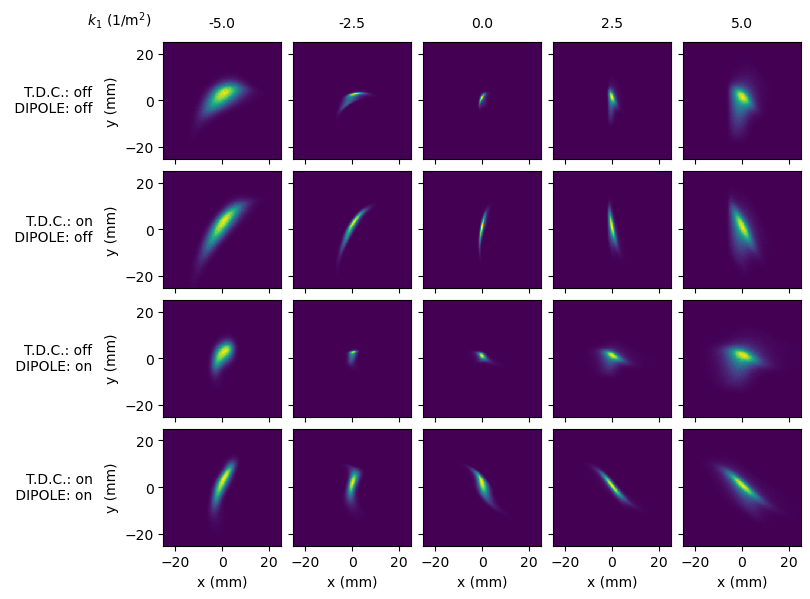

In [5]:
from phase_space_reconstruction.visualization import plot_3d_scan_data
fig, ax = plot_3d_scan_data(train_dset_3d_scan, bins, publication_size=True)
for ele in ax[-1]:
    ele.set_xticks([-20,0,20])
for ele in ax[:,0]:
    ele.set_yticks([-20,0,20])

#fig.savefig("nonlinear_data.png",dpi=300)
#fig.savefig("nonlinear_data.svg")
#plt.show()

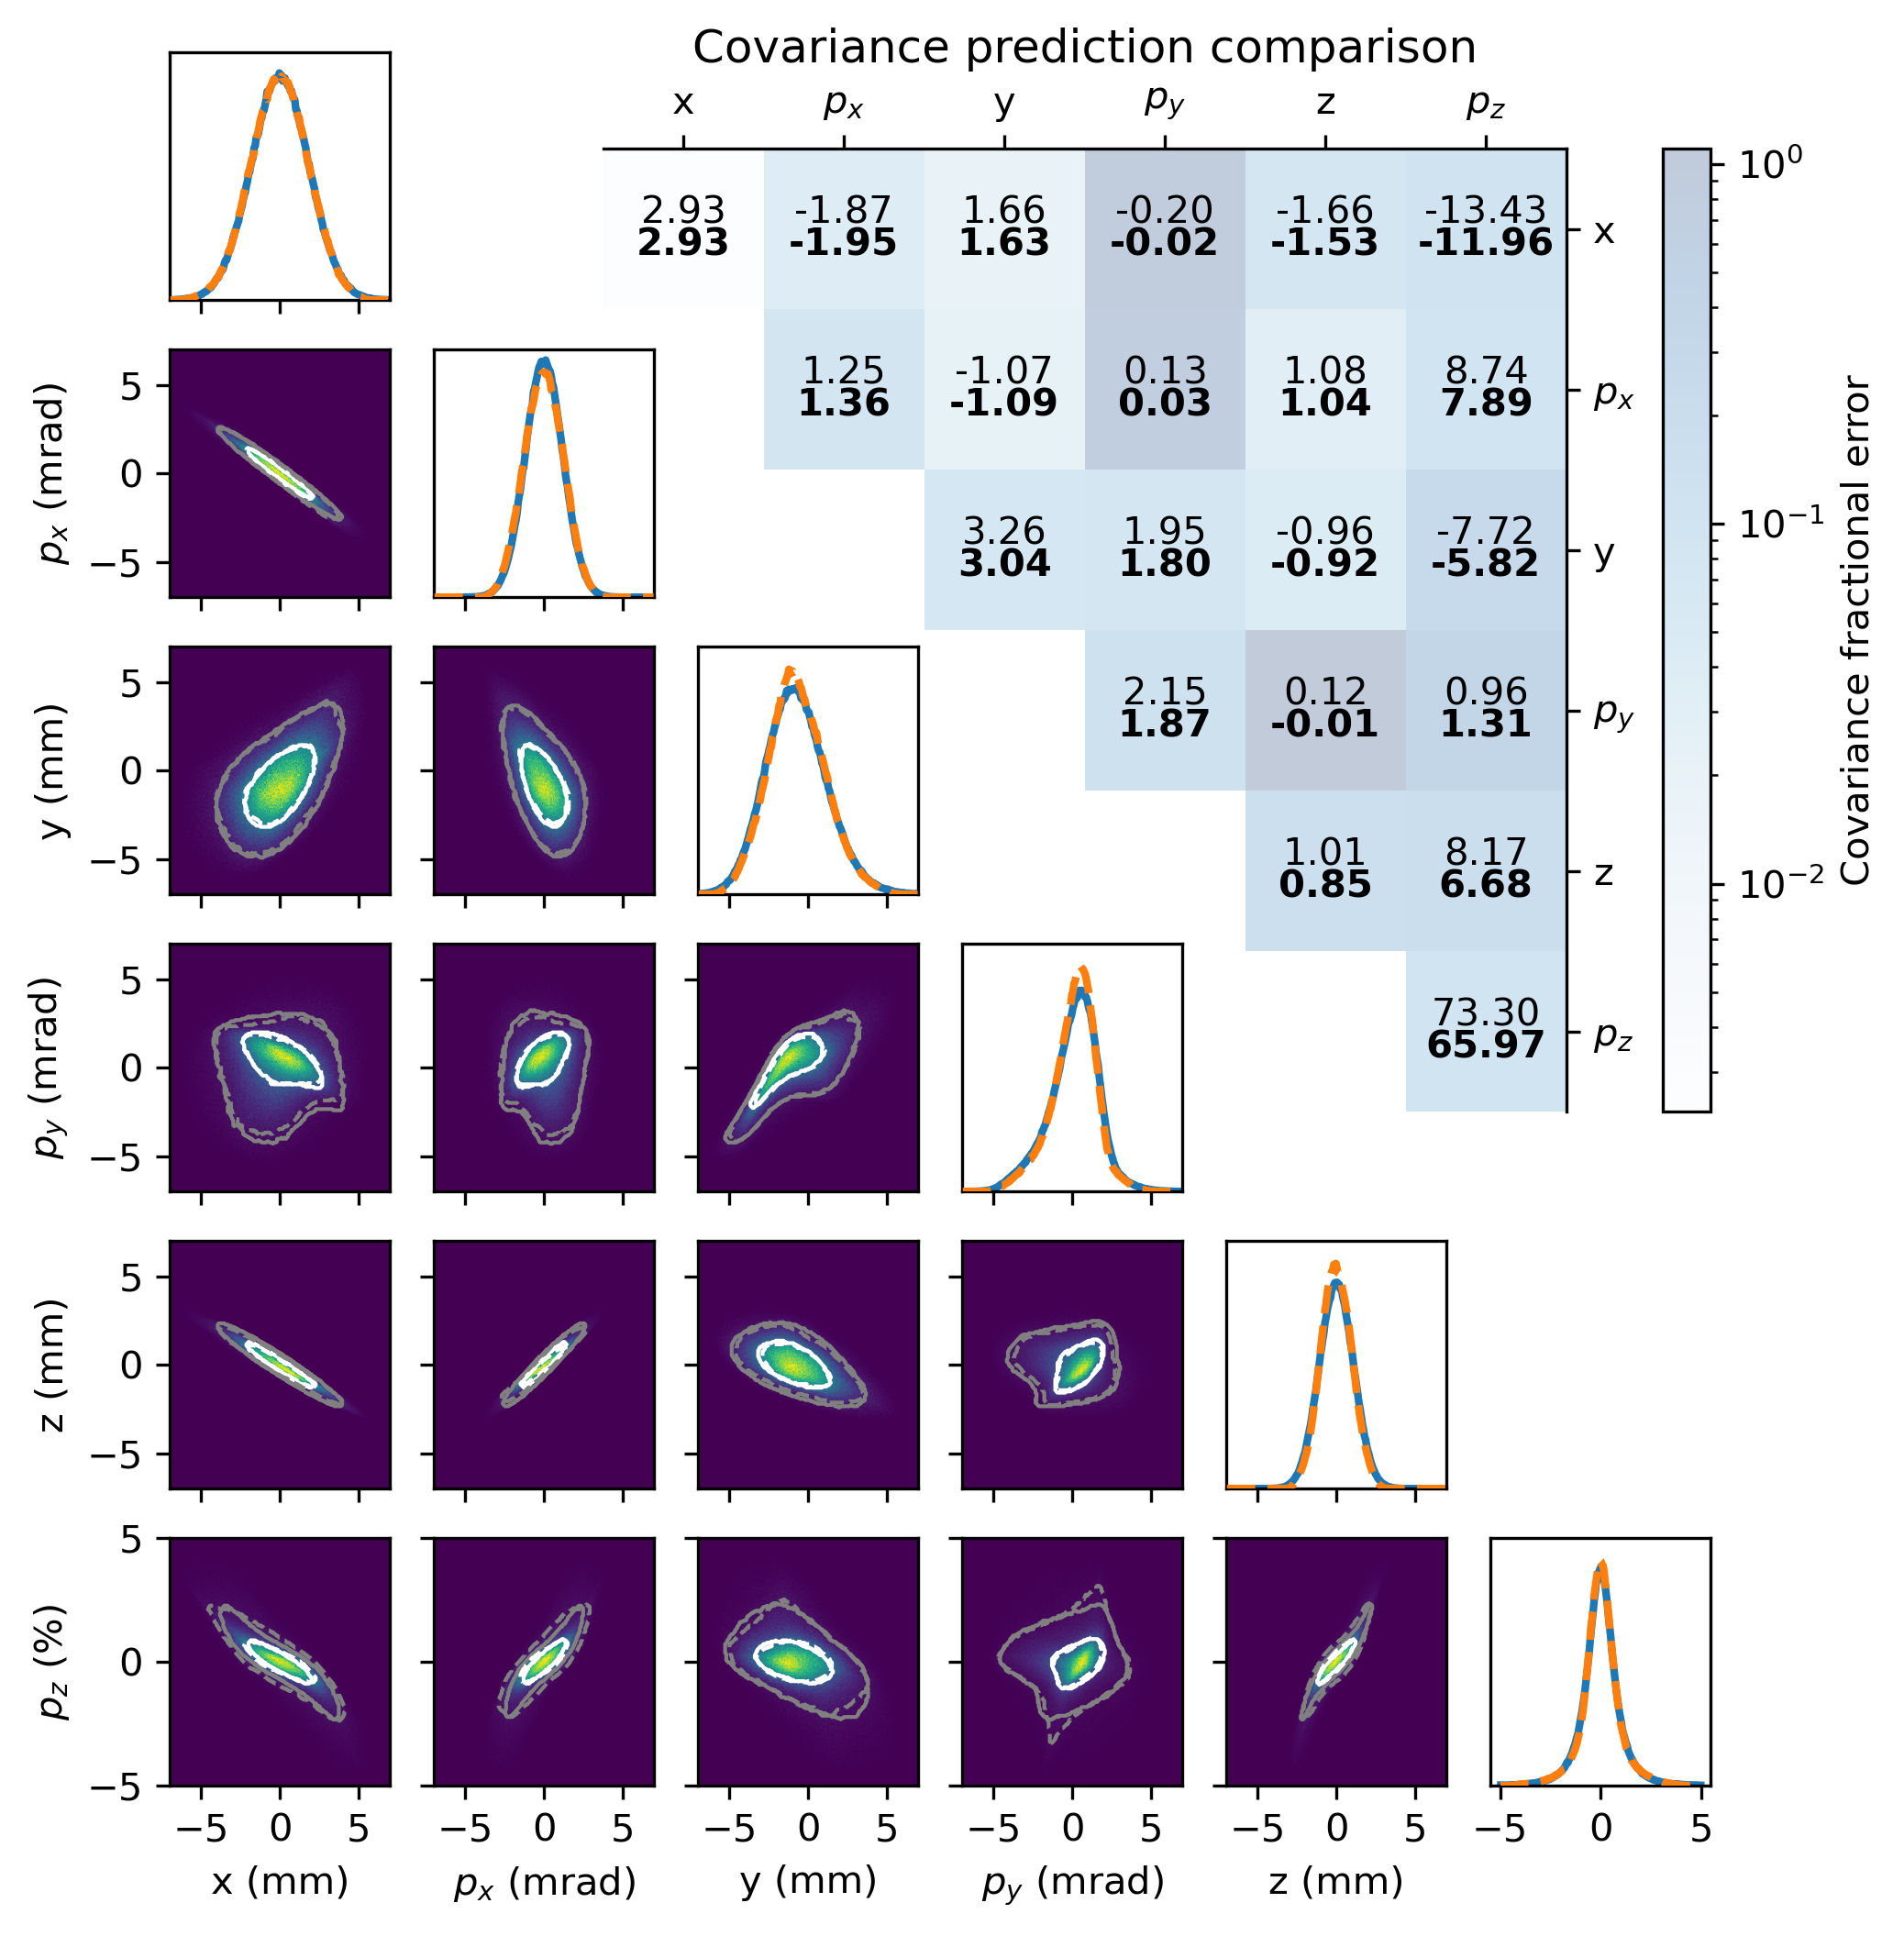

In [6]:
from stats import plot_prab_figure

lims = np.array([[-7, 7],
                 [-7, 7],
                 [-7, 7],
                 [-7, 7],
                 [-7, 7],
                 [-5, 5]])

fig = plot_prab_figure(
    torch.load(os.path.join(save_dir, 'dist_3000.pt')),
    gt_beam,
    n_bins=200,
    contour_percentiles = [50, 90],
    custom_lims=lims,
)
#fig.savefig("nonlinear_reconstruction.png",dpi=300)
#fig.savefig("nonlinear_reconstruction.svg")

In [7]:
torch.cuda.empty_cache()